In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)


2113536/2110848 [==============================] - 7s 3us/step


In [5]:
train_data.shape

(8982,)

In [9]:
reuters.get_word_index()

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [14]:
import numpy as np
def vectorize_sequences(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [15]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
from keras.utils.np_utils import to_categorical
ohe_train_labels = to_categorical(train_labels)
ohe_test_labels = to_categorical(test_labels)

In [17]:
from keras import models
from keras import layers

In [18]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [19]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [20]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = ohe_train_labels[:1000]
partial_y_train = ohe_train_labels[1000:]

In [21]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val)
                   )

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 102us/step - loss: 2.8182 - accuracy: 0.5159 - val_loss: 1.8383 - val_accuracy: 0.6400
Epoch 2/20
7982/7982 [==============================] - 1s 82us/step - loss: 1.5027 - accuracy: 0.6956 - val_loss: 1.3470 - val_accuracy: 0.7090
Epoch 3/20
7982/7982 [==============================] - 1s 89us/step - loss: 1.0912 - accuracy: 0.7679 - val_loss: 1.1423 - val_accuracy: 0.7520
Epoch 4/20
7982/7982 [==============================] - 1s 88us/step - loss: 0.8578 - accuracy: 0.8190 - val_loss: 1.0336 - val_accuracy: 0.7860
Epoch 5/20
7982/7982 [==============================] - 1s 99us/step - loss: 0.6867 - accuracy: 0.8571 - val_loss: 0.9658 - val_accuracy: 0.7930
Epoch 6/20
7982/7982 [==============================] - 1s 97us/step - loss: 0.5501 - accuracy: 0.8874 - val_loss: 0.9267 - val_accuracy: 0.8070
Epoch 7/20
7982/7982 [==============================] - 1s 88us/step - loss: 0.44

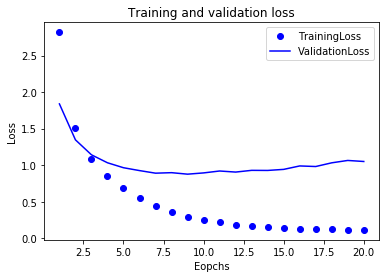

In [23]:
import matplotlib.pyplot as plt

loss = history.history.get('loss')
val_loss = history.history.get('val_loss')

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='TrainingLoss')
plt.plot(epochs, val_loss, 'b', label='ValidationLoss')
plt.title('Training and validation loss')
plt.xlabel('Eopchs')
plt.ylabel('Loss')

plt.legend()
plt.show()

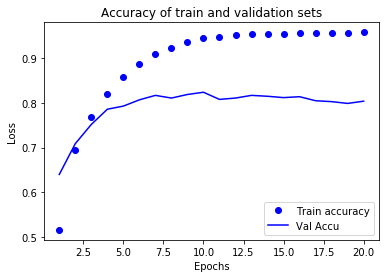

In [27]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label="Train accuracy")
plt.plot(epochs, val_acc, 'b', label="Val Accu")
plt.title("Accuracy of train and validation sets")
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

In [34]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val)
                   )
results = model.evaluate(x_test, ohe_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 104us/step - loss: 2.9094 - accuracy: 0.4654 - val_loss: 1.9737 - val_accuracy: 0.6550
Epoch 2/9
7982/7982 [==============================] - 1s 94us/step - loss: 1.5723 - accuracy: 0.7017 - val_loss: 1.3526 - val_accuracy: 0.7160
Epoch 3/9
7982/7982 [==============================] - 1s 95us/step - loss: 1.1071 - accuracy: 0.7714 - val_loss: 1.1507 - val_accuracy: 0.7550
Epoch 4/9
7982/7982 [==============================] - 1s 107us/step - loss: 0.8684 - accuracy: 0.8175 - val_loss: 1.0453 - val_accuracy: 0.7850
Epoch 5/9
7982/7982 [==============================] - 1s 109us/step - loss: 0.6927 - accuracy: 0.8602 - val_loss: 1.0126 - val_accuracy: 0.7950
Epoch 6/9
7982/7982 [==============================] - 1s 94us/step - loss: 0.5584 - accuracy: 0.8879 - val_loss: 0.9392 - val_accuracy: 0.8130
Epoch 7/9
7982/7982 [==============================] - 1s 96us/step - loss: 0.4507 - 

In [35]:
results


[0.9657431780389665, 0.7934104800224304]

array([ 3,  4,  3, ..., 25,  3, 25])